In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Открываем файл diamonds.csv
df = pd.read_csv('diamonds.csv')
df.head()

# Выводим размерность
print('Количество строк:', df.shape[0])
print('Количество столбцов:', df.shape[1])




Количество строк: 53940
Количество столбцов: 11


In [17]:

df = df.drop('Unnamed: 0', axis=1)
#исследование на наличие пустых значений
empty_values = [value for value in df if value == '']
if empty_values:
    print("Найдены пустые значения:", empty_values)
else:
    print("Пустых значений не найдено")


Пустых значений не найдено


In [ ]:
Вывод: пустых значений не найдено, значит мы работаем со всей таблицей

построение матрицы корреляции в виде heatmap

<ipython-input-18-86491ebb7a31>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


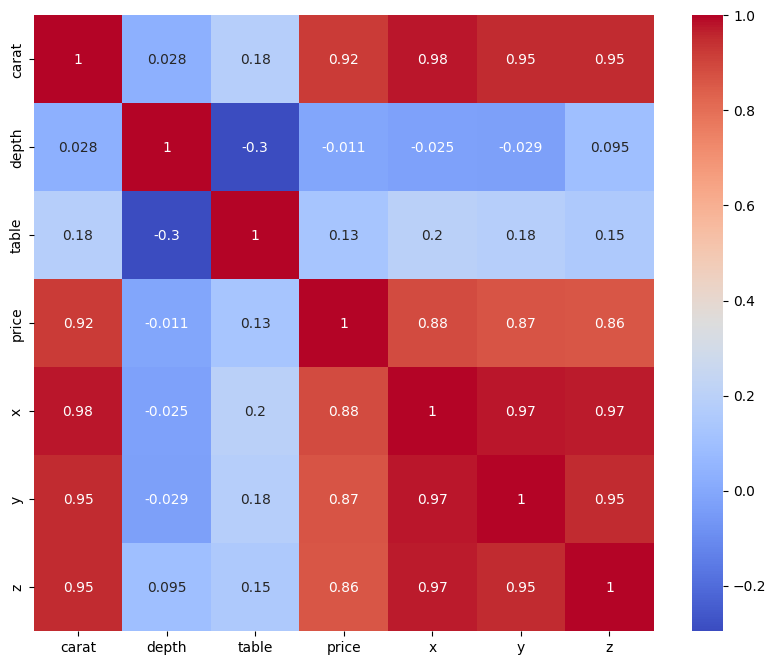

In [18]:




# Построение матрицы корреляции
corr_matrix = df.corr()

# Создание heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Отображение графика
plt.show()


вывод: цена сильнее всего коррелирует со столбцами x, y, z, carat. Со столбцом table слабее связь, а с depth почти 0.

построение матрицы корреляции в виде boxplot для оценки выбросов

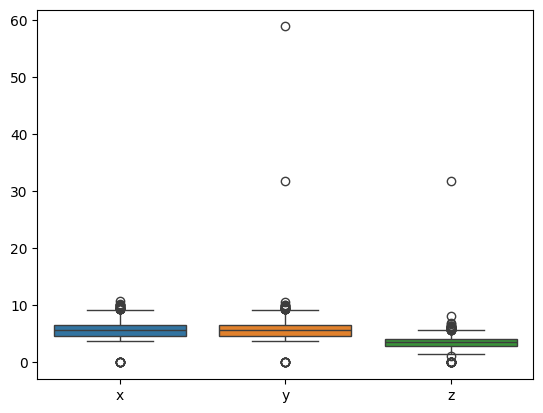

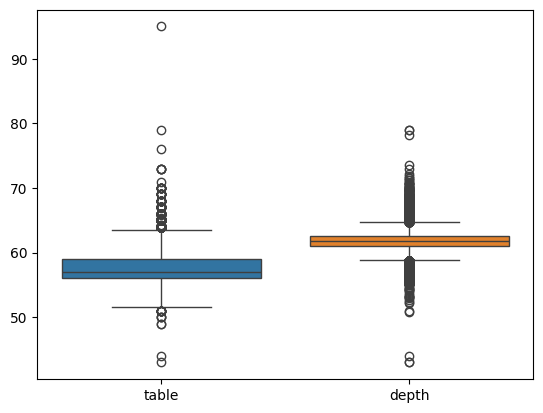

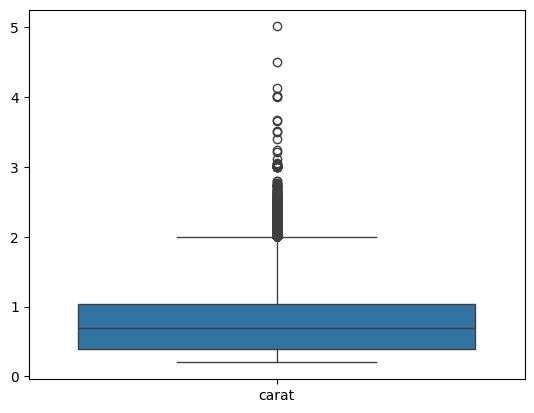

<Axes: >

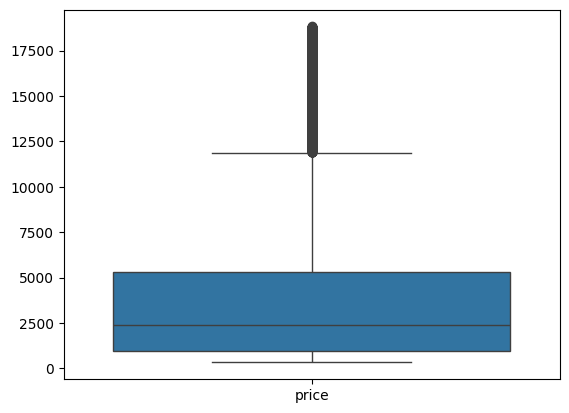

In [19]:



# Построение boxplot для каждого столбца матрицы корреляции
sns.boxplot(data=df[["x", "y", "z"]])
plt.show()
sns.boxplot(data=df[["table", "depth"]])
plt.show()
sns.boxplot(data=df[["carat"]])
plt.show()
sns.boxplot(data=df[["price"]])


вывод:у столбцов x, y, z очень мало выбросов, но они сильно отличаются от среднего значения. У столбцов table и depth много выбросов, но они меньше отличаются от среднего. У столбца carat много выбросов, причем довольно много тех, которые очень сильно отличаются от средних значений.

формирования подвыборок train и test

In [20]:
from sklearn.model_selection import train_test_split


# Разделение данных на признаки и целевую переменную
X = df.drop('price', axis=1)[["carat","table", "x", "y", "z"]]
y = df['price']

# Разбиение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


обучение модели

In [21]:
from sklearn.linear_model import LinearRegression
# Создание объекта модели
model = LinearRegression()

# Обучение модели на тренировочных данных
model.fit(X_train, y_train)

# Вывод уравнения регрессии
coefficients = model.coef_
intercept = model.intercept_
print(coefficients)
equation = "'price' = {} + {} * 'carat'  + {} * 'table' + {} * 'x' + {} * 'y' + {} * 'z'".format(intercept, coefficients[0], coefficients[1], coefficients[2], coefficients[3], coefficients[4])

print('Уравнение регрессии:')
print(equation)



[10164.97395947   -73.58250089  -758.88604272   116.06879846
  -598.97460473]
Уравнение регрессии:
'price' = 5857.986888878547 + 10164.973959467783 * 'carat'  + -73.58250088531008 * 'table' + -758.8860427183849 * 'x' + 116.06879846136911 * 'y' + -598.9746047257952 * 'z'


значимость признаков

In [22]:
import pandas as pd

# Создание датафрейма с именами признаков и их весами
feature_weights = pd.DataFrame({'Feature': X.columns, 'Weight': coefficients})

# Сортировка признаков по убыванию весов
feature_weights = feature_weights.sort_values(by='Weight', ascending=False)

print('Значимость признаков:')
print(feature_weights)


Значимость признаков:
  Feature        Weight
0   carat  10164.973959
3       y    116.068798
1   table    -73.582501
4       z   -598.974605
2       x   -758.886043


предсказание целевой переменной

In [23]:
# Предсказание на тестовых данных
y_pred = model.predict(X_test)


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE:', mae)
print('MSE:', mse)
print('R2:', r2)


MAE: 906.6968401716238
MSE: 2291545.106724214
R2: 0.8558488491708738




---

